# HRP Portfolio Optimization

In [14]:
%load_ext autoreload
%autoreload 2
# imports
from src.utils.DataProvider import DataProvider



import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
import datetime

# Fetch data
tickers = [
    "^FTSE",
    "SPY",
    "GOLD",
    "^GDAXI",
    "^RUT",
    "AAPL",
    "BAC",
    "NVDA",
    "MSTR",
    "BA",
    "FLUT",
    "TSM",
    "JPM",
    "^N225"
]
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime(2023, 12, 31)

data_provider = DataProvider(start, end, tickers)
data = data_provider.provide()
data.head()


[*********************100%***********************]  14 of 14 completed
/Users/santi/PycharmProjects/HRP-Portfolio-Optimization/src/utils/DataProvider.py:63: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data = self.data.pct_change()


Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-03,0.006754,0.008855,-0.006226,0.0,0.010842,0.019654,-0.027690,0.000000,0.003075,0.023351,-0.001122,-0.003897,0.000000,-0.005782
2003-01-06,0.000000,-0.001463,0.014379,0.0,-0.010094,0.078643,0.093851,0.081241,0.017624,0.026846,-0.000899,0.020793,0.000000,0.017140
2003-01-07,-0.003352,-0.024319,0.001544,0.0,-0.019758,-0.005004,0.044379,-0.003011,-0.002474,0.003922,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08,-0.020205,0.006007,-0.004064,0.0,0.016255,-0.038434,-0.045326,-0.099473,-0.014450,-0.042969,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09,0.008937,0.011940,0.013086,0.0,-0.014076,0.019799,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657


<Axes: title={'center': 'Data Overview'}, xlabel='Date', ylabel='Price'>

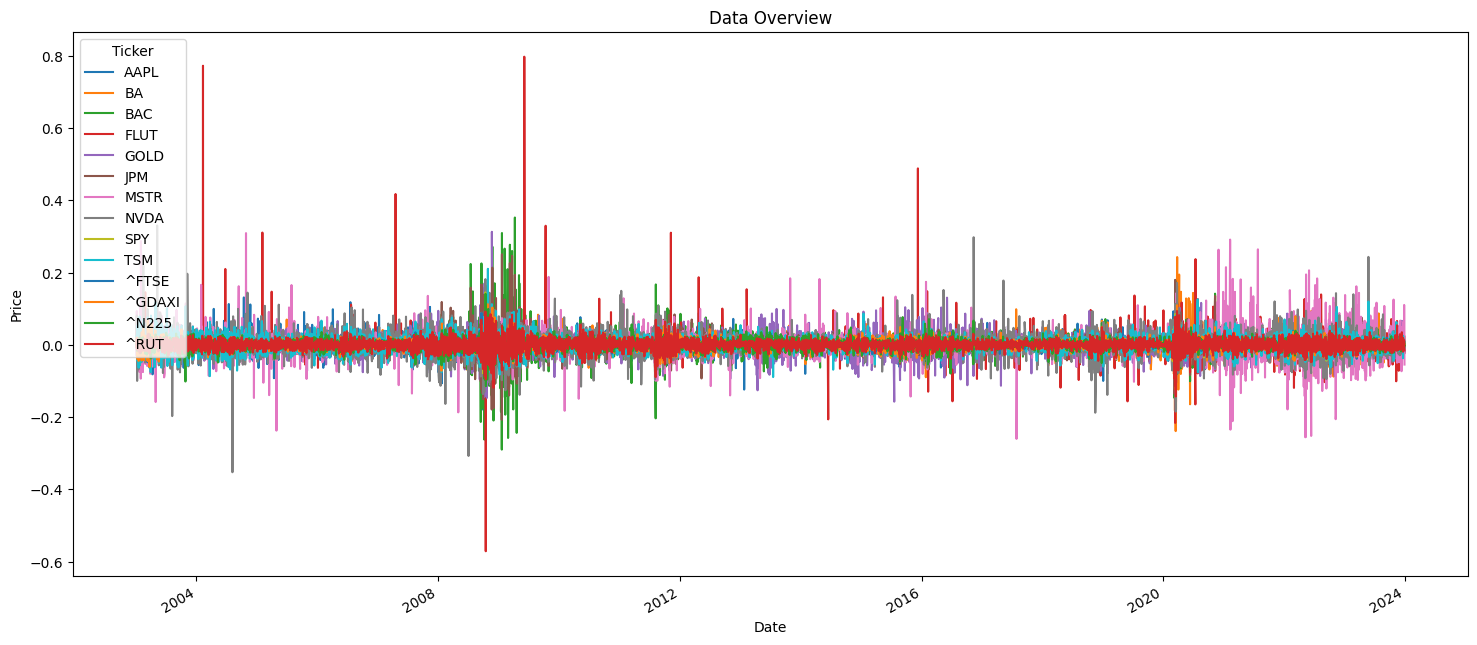

In [3]:
data.plot(figsize=(18, 8), ylabel="Price", title="Data Overview")

In [42]:
data.shape

(5463, 14)

In [8]:
# Transformation
X = data.copy("deep")
rows = len(X)
training_rows = int(rows * 0.8) # amount of training rows (80%)
training_rows


3882

In [57]:
X_train = X.head(training_rows)
X_test = X.tail(rows - training_rows)

# calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [67]:
def correlation_distance(corr):
    dist = ((1 - corr) / 2.0) ** 0.5
    return dist

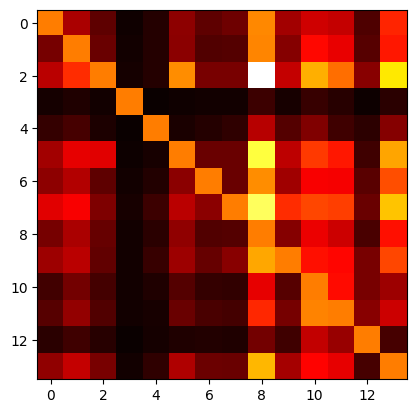

In [74]:
sigmas = returns.cov()

D = 1 / np.sqrt(np.diag(sigmas)) # takes the inverse of sqrt of diag.
corr =  D * sigmas * D
# corr = returns.corr()

plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()
# returns.corr()


In [63]:
# Calculate linkage
dist = correlaiton_distance(returns.corr())
link = linkage(dist, "ward") # TODO: investigate what this does
link[0]

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_79448/861281921.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, "ward") # TODO: investigate what this does


array([ 8.        , 13.        ,  0.33174373,  2.        ])

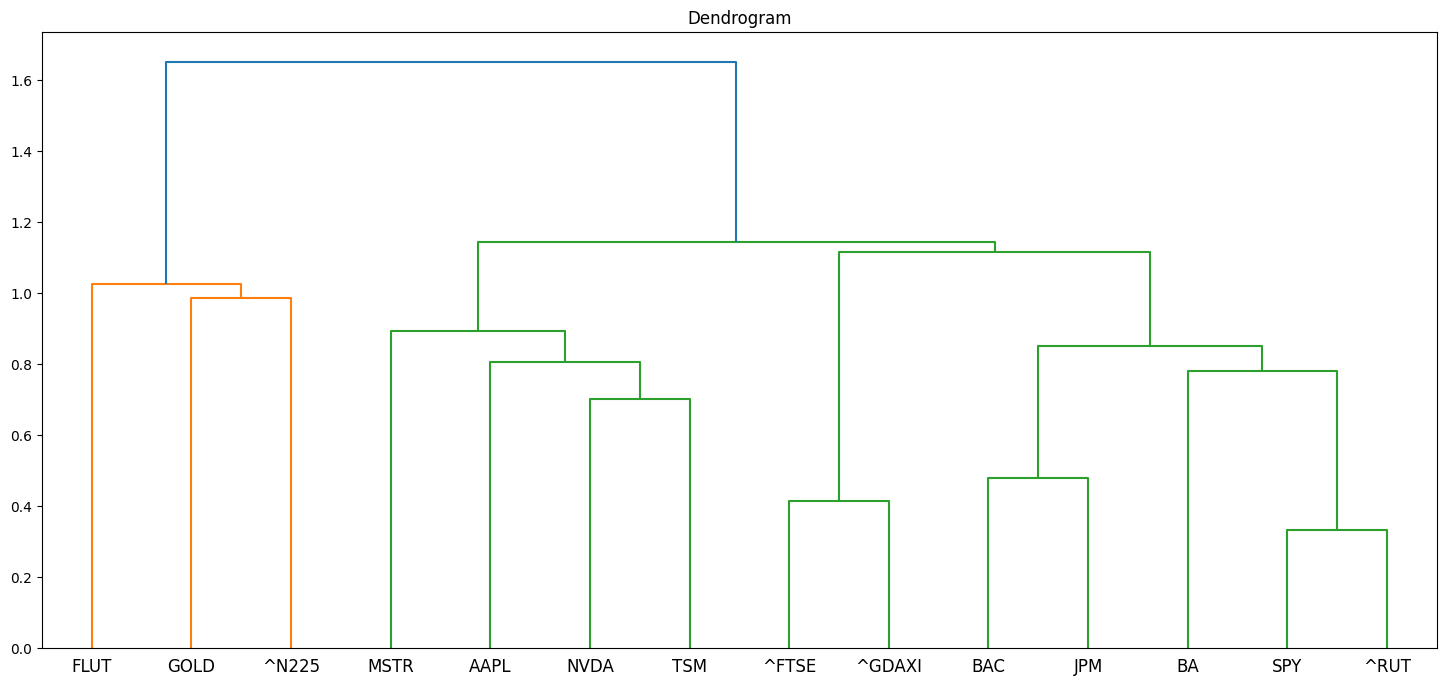

In [64]:
# Plot dendogram
plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
dendrogram(link, labels = X.columns)
plt.show()

In [92]:
hrp = HRP()
hrp.getQuasiDiag(link)
# link[-1,1]


[3, 4, 12, 6, 0, 7, 9, 10, 11, 2, 5, 1, 8, 13]

In [9]:
import sys
import os
sys.path.append(os.path.abspath('/Users/Francesco/HRP-Portfolio-Optimization/src'))
print(sys.path)

['/Users/Francesco/anaconda3/lib/python311.zip', '/Users/Francesco/anaconda3/lib/python3.11', '/Users/Francesco/anaconda3/lib/python3.11/lib-dynload', '', '/Users/Francesco/HRP-Portfolio-Optimization/venv/lib/python3.11/site-packages', '/Users/Francesco/HRP-Portfolio-Optimization/src']


In [8]:
data

Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-07 00:00:00+00:00,-0.003352,-0.024319,0.001544,0.000000,-0.019758,-0.005003,0.044379,-0.003011,-0.002474,0.003921,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08 00:00:00+00:00,-0.020205,0.006006,-0.004064,0.000000,0.016255,-0.038434,-0.045326,-0.099473,-0.014451,-0.042969,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09 00:00:00+00:00,0.008937,0.011940,0.013085,0.000000,-0.014076,0.019798,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657
2003-01-10 00:00:00+00:00,0.002724,-0.001475,-0.002778,0.000000,0.016224,-0.007692,-0.016763,0.017270,0.002694,0.032258,0.010193,-0.000115,-0.003234,0.001263
2003-01-14 00:00:00+00:00,-0.007472,0.008863,0.009471,0.000000,-0.041507,0.018457,0.067607,-0.000805,0.002901,0.033750,-0.007171,0.020212,0.009753,0.005070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,-0.000770,0.006801,0.006671,-0.002152,0.011255,0.005704,0.014787,0.018270,0.009482,0.025090,-0.002722,-0.002727,-0.015901,0.017258
2023-12-22 00:00:00+00:00,-0.005547,-0.006030,0.006928,-0.006788,0.010573,-0.000597,0.064078,-0.003266,0.002010,0.005851,0.000364,0.001124,0.000862,0.008378
2023-12-27 00:00:00+00:00,-0.002325,0.006374,0.012264,0.008240,0.017071,0.011948,0.083118,0.012021,0.006038,0.014542,0.003573,0.002148,0.015442,0.015856


In [40]:
from src.models.HRP_calculator import HRP_Calculator
import sklearn

# Assuming 'data' is defined or loaded earlier in your code
idk = HRP_Calculator(data)
weights = idk.weights_allocate()
weights

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  eucledian_df = self.stats_module.calc_eucledian_distance()
/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observa

{'SPY': 0.005949058217211126,
 '^RUT': 0.0031347753953755424,
 '^FTSE': 0.00021183993953826226,
 '^GDAXI': 0.7046314420320079,
 'BAC': 0.024793668555569096,
 'JPM': 5.161880863247751e-05,
 'NVDA': 0.13942969870647956,
 'TSM': 0.00046459453149316293,
 'AAPL': 8.940018921367494e-05,
 'BA': 0.0004522430386792999,
 'MSTR': 0.006530783394691788,
 'GOLD': 0.011196739703272184,
 '^N225': 0.10301137368229372,
 'FLUT': 5.276380554221313e-05}

Testing whether the HRP class actually works

In [8]:
#%pip install -U pypfopt

from pypfopt import HRPOpt

In [37]:
HRPOpt(data)._get_cluster_var(data.cov(), data.columns)

0.00011236981709777981

In [35]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage


cov_matrix = data.cov()
distance_matrix = pdist(cov_matrix, 'euclidean')
link = linkage(distance_matrix, "single")

# Initialize HRPOpt with data
hrp_opt = HRPOpt(data)
quasi_diag = hrp_opt._get_quasi_diag(link)
ordered_tickers = cov_matrix.columns[quasi_diag] 
weights = hrp_opt._raw_hrp_allocation(cov_matrix, ordered_tickers)
weights

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/venv/lib/python3.11/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.34995545 0.34995545 0.34995545 0.34995545 0.34995545 0.34995545
 0.34995545]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Ticker
MSTR      0.035106
FLUT      0.050963
NVDA      0.037975
GOLD      0.046292
AAPL      0.071085
TSM       0.054998
BA        0.053536
^N225     0.174398
^FTSE     0.150990
^GDAXI    0.102763
SPY       0.107393
^RUT      0.064544
BAC       0.019281
JPM       0.030675
dtype: float64

In [1]:
print(cov_matrix.columns[quasi_diag])

NameError: name 'cov_matrix' is not defined

In [49]:
from src.models.HRP_new import HRPOptimizer

# Tickers in order by distance  (quasi-diagonal)
ordered_tickers = cov_matrix.columns[quasi_diag] 

my_weights = HRPOptimizer(data).raw_hrp_allocation(cov_matrix, ordered_tickers)
my_weights

[Index(['MSTR', 'FLUT', 'NVDA', 'GOLD', 'AAPL', 'TSM', 'BA'], dtype='object', name='Ticker'), Index(['^N225', '^FTSE', '^GDAXI', 'SPY', '^RUT', 'BAC', 'JPM'], dtype='object', name='Ticker')]
[Index(['MSTR', 'FLUT', 'NVDA'], dtype='object', name='Ticker'), Index(['GOLD', 'AAPL', 'TSM', 'BA'], dtype='object', name='Ticker'), Index(['^N225', '^FTSE', '^GDAXI'], dtype='object', name='Ticker'), Index(['SPY', '^RUT', 'BAC', 'JPM'], dtype='object', name='Ticker')]
[Index(['MSTR'], dtype='object', name='Ticker'), Index(['FLUT', 'NVDA'], dtype='object', name='Ticker'), Index(['GOLD', 'AAPL'], dtype='object', name='Ticker'), Index(['TSM', 'BA'], dtype='object', name='Ticker'), Index(['^N225'], dtype='object', name='Ticker'), Index(['^FTSE', '^GDAXI'], dtype='object', name='Ticker'), Index(['SPY', '^RUT'], dtype='object', name='Ticker'), Index(['BAC', 'JPM'], dtype='object', name='Ticker')]
[Index(['FLUT'], dtype='object', name='Ticker'), Index(['NVDA'], dtype='object', name='Ticker'), Index(['GO

/Users/Francesco/Desktop/MSMFT/MF703/HRP-Portfolio-Optimization/src/models/HRP_new.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.34995545 0.34995545 0.34995545 0.34995545 0.34995545 0.34995545
 0.34995545]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Ticker
MSTR      0.035106
FLUT      0.050963
NVDA      0.037975
GOLD      0.046292
AAPL      0.071085
TSM       0.054998
BA        0.053536
^N225     0.174398
^FTSE     0.150990
^GDAXI    0.102763
SPY       0.107393
^RUT      0.064544
BAC       0.019281
JPM       0.030675
dtype: float64

In [19]:
from src.models.HRP_calculator import HRP_Calculator
hrp = HRP_Calculator(data)
weights = hrp.weights_allocate()
print(weights)


{'SPY': 0.00594905939662727, '^RUT': 0.0031347754509654558, '^FTSE': 0.00021183994088628107, '^GDAXI': 0.7046314438924888, 'BAC': 0.024793661831122252, 'JPM': 5.1618809686935256e-05, 'NVDA': 0.139429712582441, 'TSM': 0.0004645945337637204, 'AAPL': 8.940017912734333e-05, 'BA': 0.00045224306105197566, 'MSTR': 0.006530784400913523, 'GOLD': 0.011196738869412031, '^N225': 0.10301136324406021, 'FLUT': 5.2763807453256685e-05}


/Users/santi/PycharmProjects/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'single')
/Users/santi/PycharmProjects/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'single')
/Users/santi/PycharmProjects/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'single')
/Users/santi/PycharmProjects/HRP-Portfolio-Optimization/src/models/HRP_calculator.py:29: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance ma